# Homework 2 - Python Portion


### Problem 2



In [34]:
from numpy.linalg import norm
import numpy as np

x = [3.4, -6.2, 0, 1.2]
y = [-1, 2.2, 3.0, 0.5]

print("Part (a)")
norm_1 = norm(x,1)
norm_2 = norm(x,2)
norm_3 = norm(x,3)
norm_inf = norm(x,np.inf)

print("1-norm: "+ "%.2f" % norm_1)
print("2-norm: "+ "%.2f" %norm_2)
print("3-norm: "+ "%.2f" %norm_3)
print("Infinity-norm: "+ "%.2f" %norm_inf)

diff = np.subtract(x,y)
diff_norm_1 = norm(diff, 1)
diff_norm_2 = norm(diff,2)
diff_norm_inf = norm(diff,np.inf)

print("Part (b)")
print("1-norm: "+ "%.2f" %diff_norm_1)
print("2-norm: "+ "%.2f" %diff_norm_2)
print("Infinity-norm: "+ "%.2f" %diff_norm_inf)

Part (a)
1-norm: 10.80
2-norm: 7.17
3-norm: 6.54
Infinity-norm: 6.20
Part (b)
1-norm: 16.50
2-norm: 9.97
Infinity-norm: 8.40


### Problem 3



In [33]:
import numpy as np
from numpy.linalg import eig

B = np.array([[-13, -8, -4],[12, 7, 4], [24, 16, 7]])
A = np.array([[5,4],[4,5]])

w,v = eig(B)

print('Eigenvalue:', w)
print('Eigenvectors: ', v)

Eigenvalue: [ 3. -1. -1.]
Eigenvectors:  [[ 0.40824829  0.57158286  0.15048813]
 [-0.40824829 -0.55534639  0.25221658]
 [-0.81649658 -0.6040558  -0.95589755]]


### Problem 5

No handles with labels found to put in legend.


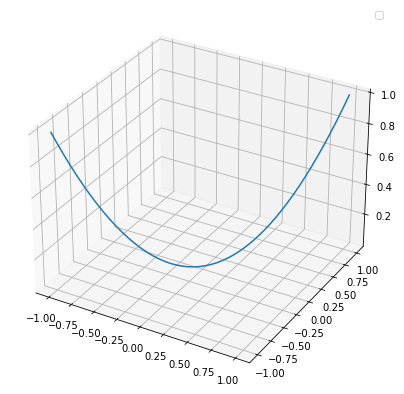

In [46]:
# Question b
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize = (9,7))
ax1 = plt.axes(projection='3d')
xd = np.linspace(-1,1)   
yd = np.linspace(-1,1)   
zd = xd ** 2 + yd ** 2 - xd*yd

x0 = np.array(a)[:,0]
x1 = np.array(a)[:,1]
z = x0 ** 2 + x1**2 - x0*x1

ax1.plot3D(xd,yd,zd) #plot the objective function
ax1.legend()
    
plt.show()

### 11 Using gradient descent to solve optimization problem

#### f(x,y)=x^2 + y^2 - xy

The initial x value is: [5 5]
The local minimum exists at: ([0.00205549 0.00205549],4.22504564995642e-06)
The initial x value is: [5 5]
The local minimum exists at: ([0.00698855 0.00698855],4.8839874833501015e-05)
The initial x value is: [5 5]
The local minimum exists at: ([0.02234243 0.02234243],0.0004991840047589514)


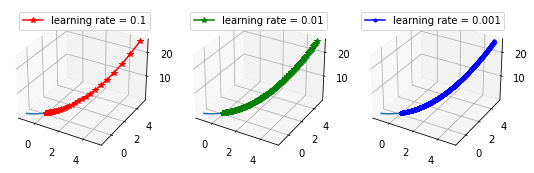

In [75]:
# Question c
import math
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def func_2d(x):
    #objective function
    return x[0] ** 2 + x[1]**2 - x[0]*x[1]


def grad_2d(x):
    #gradient of the function
    deriv0 = 2*x[0]-x[1]
    deriv1 = 2*x[1]-x[0]
    return np.array([deriv0, deriv1])


def gradient_descent_2d(grad, cur_x, learning_rate, precision, max_iters,history_x):
    """
    :param grad: gradient
    :param prev_x: x value from previous iteration {initalized with cur_x}
    :param cur_x: current x value
    :param learning_rate: learning rate
    :param precision: convergence precision
    :param max_iters: maximum number of iterations
    :param history_x: track the change of x
    :return: x changes until convergence
    """
    print(f"The initial x value is: {cur_x}")
    for i in range(max_iters):
        grad_cur = grad(cur_x)
        history_x.append(cur_x) #track the change of x
        last_x = cur_x
        cur_x = cur_x - grad_cur * learning_rate
        if abs(func_2d(last_x)-func_2d(cur_x)) < precision:
            break  # when the difference close to 0, we assume the convergence

    #print("[x1,x2] =", cur_x)
    #print("local minimum ",func_2d(cur_x))
    print(f"The local minimum exists at: ({cur_x},{func_2d(cur_x)})")
    return history_x

a = gradient_descent_2d(grad_2d, cur_x=np.array([5,5]), learning_rate = 0.1, precision=0.000001, max_iters=10000,history_x=[])
b = gradient_descent_2d(grad_2d, cur_x=np.array([5,5]), learning_rate = 0.01, precision=0.000001, max_iters=10000,history_x=[])
c = gradient_descent_2d(grad_2d, cur_x=np.array([5,5]), learning_rate = 0.001, precision=0.000001, max_iters=10000,history_x=[])

fig=plt.figure(figsize = (9,7))
# ax1 = plt.axes(projection='3d') #fig.add_subplot(111, projection='3d')
ax1 = fig.add_subplot(131, projection = '3d')
ax2 = fig.add_subplot(132, projection = '3d')
ax3 = fig.add_subplot(133, projection = '3d')
xd = np.linspace(-1,1)   
yd = np.linspace(-1,1)   
zd = xd ** 2 + yd ** 2 - xd*yd

a0 = np.array(a)[:,0]
a1 = np.array(a)[:,1]

b0 = np.array(b)[:,0]
b1 = np.array(b)[:,1]

c0 = np.array(c)[:,0]
c1 = np.array(c)[:,1]

z_a = a0 ** 2 + a1**2 - a0*a1
z_b = b0 ** 2 + b1**2 - b0*b1
z_c = c0 ** 2 + c1**2 - c0*c1

# Plot all our different learning rates
ax1.plot3D(xd,yd,zd) #plot the objective function
ax1.plot3D(a0,a1,z_a,color='r',marker='*',label = 'learning rate = 0.1') #plot the convergence track
ax1.legend()

ax2.plot3D(xd,yd,zd)
ax2.plot3D(b0,b1,z_b,color='g',marker='*',label = 'learning rate = 0.01')
ax2.legend()

ax3.plot3D(xd,yd,zd)
ax3.plot3D(c0,c1,z_c,color='b',marker='.',label = 'learning rate = 0.001')
ax3.legend()

plt.show()
